In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
CONS_TEST_SIZE = 0.2
CONS_RANDOM_STATE = 42

#### Cargar datos

In [3]:
df = pd.read_excel(
    '../data/original/Identia_UNED_TLP.xlsx'
)

In [4]:
df.head()

,etiq-id,etiq-diagMMSE,etiq-diagExpTLPtext,etiq-diagExpTLPcode,etiq-diagExpTLP,etiq-diagExpTLPtext_R2,etiq-diagExpTLPcode_R2,etiq-diagExpTLP_R2,demo-genero,demo-fechaEvaluacion,...,eval-TLP-Tavec-29_RCl_Cp_frente_RCl_LP-PD,eval-TLP-Tavec-29_RCl_Cp_frente_RCl_LP-PZ,eval-TLP-Tavec-30_RL_LP_frente_RL_CP-PD,eval-TLP-Tavec-30_RL_LP_frente_RL_CP-PZ,eval-TLP-Tavec-31_RCl_LP_frente_RL_LP-PD,eval-TLP-Tavec-31_RCl_LP_frente_RL_LP-PZ,eval-TLP-Tavec-32_Recon_Ac_frente_RL_LP-PD,eval-TLP-Tavec-32_Recon_Ac_frente_RL_LP-PZ,eval-TLP-Tavec-33_Recon_Ac_frente_RCl_LP-PD,eval-TLP-Tavec-33_Recon_Ac_frente_RCl_LP-PZ
0,ID_M_Rango3_056_ED2,ED2,"DC MUY LEVE, ejecutivo - atencional",2.07,ED2,"DC MUY LEVE, ejecutivo - atencional",2.07,ED2,2,2024-02-22T00:00:00,...,33.33,1.70,37.50,1.07,-33.33,-0.55,-38.46,0.23,-7.69,1.19
1,ID_M_Rango3_312_ED3,ED3,"DC LEVE, ejecutivo - atencional",3.07,ED3,"DC LEVE, multidominio amnésico",3.06,ED3,2,2024-06-26T00:00:00,...,0.00,0.63,0.00,0.12,0.00,0.43,-20.00,0.92,-20.00,0.65
2,ID_M_Rango2_220_ED1,ED1,NORMAL,1.00,ED1,"DC MUY LEVE, multidominio amnésico",2.06,ED2,2,2024-05-14T00:00:00,...,25.00,1.94,-20.00,-0.78,0.00,0.46,-16.67,0.69,-16.67,0.30
3,ID_M_Rango1_122_ED1,ED1,"DC MUY LEVE, amnésico",2.01,ED2,"DC MUY LEVE, amnésico",2.01,ED2,2,2024-04-10T00:00:00,...,0.00,0.57,50.00,2.95,-20.00,-0.71,-50.00,-1.54,-37.50,-1.28
4,ID_M_Rango1_233_ED2,ED2,"DC MUY LEVE, multidominio amnésico",2.06,ED2,"DC LEVE, multidominio amnésico",3.06,ED3,2,2024-05-14T00:00:00,...,0.00,0.57,-33.33,-1.60,0.00,0.29,-10.00,0.78,-10.00,0.50


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Columns: 175 entries, etiq-id to eval-TLP-Tavec-33_Recon_Ac_frente_RCl_LP-PZ
dtypes: bool(31), float64(65), int64(67), object(12)
memory usage: 362.9+ KB


##### Generar la columna "ED_2Clases" a partir de la variable "etiq-diagExpTLP_R2

In [6]:
def transfor_ed(row):
   if row['etiq-diagExpTLP_R2'] == 'ED1':
      return 'H'
   elif row['etiq-diagExpTLP_R2'] == 'ED2' or row['etiq-diagExpTLP_R2'] == 'ED3':
      return 'D'

In [7]:
df['ED_2Clases'] = df.apply(transfor_ed, axis=1)

##### Proyectar columnas

In [8]:
columns = [
    'ED_2Clases',
    'clin-reservaCognitiva_escolaridad',
    'demo-edad',
    'demo-genero',
    'eval-TLP-CubCorsi-totalDirectos-PD',
    'eval-TLP-CubCorsi-totalinversos-PD',
    'eval-TLP-CubCorsi-total-PD',
    'eval-TLP-FigRey-Duracion-PD',
    'eval-TLP-FigRey-totalCopia-PD',
    'eval-TLP-FigRey-totalMemoria-PD',
    'eval-TLP-Stroop-palabras-PD',
    'eval-TLP-Stroop-color-PD',
    'eval-TLP-Stroop-palabrasColor-PD',
    'eval-TLP-Tavec-1_RI_A1-PD',
    'eval-TLP-Tavec-10_RL_LP-PD',
    'eval-TLP-Tavec-11_RCl_LP-PD',
    'eval-TLP-Tavec-2_RI_A5-PD',
    'eval-TLP-Tavec-3_RI_AT-PD',
    'eval-TLP-Tavec-8_RL_CP-PD',
    'eval-TLP-Tavec-9_RCl_CP-PD'
]

In [9]:
df = df[columns]

In [10]:
df.shape

(314, 20)

In [11]:
df.head()

,ED_2Clases,clin-reservaCognitiva_escolaridad,demo-edad,demo-genero,eval-TLP-CubCorsi-totalDirectos-PD,eval-TLP-CubCorsi-totalinversos-PD,eval-TLP-CubCorsi-total-PD,eval-TLP-FigRey-Duracion-PD,eval-TLP-FigRey-totalCopia-PD,eval-TLP-FigRey-totalMemoria-PD,eval-TLP-Stroop-palabras-PD,eval-TLP-Stroop-color-PD,eval-TLP-Stroop-palabrasColor-PD,eval-TLP-Tavec-1_RI_A1-PD,eval-TLP-Tavec-10_RL_LP-PD,eval-TLP-Tavec-11_RCl_LP-PD,eval-TLP-Tavec-2_RI_A5-PD,eval-TLP-Tavec-3_RI_AT-PD,eval-TLP-Tavec-8_RL_CP-PD,eval-TLP-Tavec-9_RCl_CP-PD
0,D,3,81,2,6,4,10,253,28.0,11.0,80,78,17,4,8,12,11,49,11,9
1,D,3,75,2,4,2,6,360,14.0,1.5,66,37,14,2,8,8,9,36,8,8
2,D,4,72,2,7,5,12,226,33.0,10.0,100,70,39,6,10,10,14,56,8,8
3,D,4,60,2,8,6,14,140,34.0,19.0,110,85,35,8,8,10,14,65,12,10
4,D,4,64,2,6,6,12,204,36.0,12.0,80,66,40,4,9,9,10,39,6,9


In [12]:
df['ED_2Clases'] = df['ED_2Clases'].astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   ED_2Clases                          314 non-null    category
 1   clin-reservaCognitiva_escolaridad   314 non-null    int64   
 2   demo-edad                           314 non-null    int64   
 3   demo-genero                         314 non-null    int64   
 4   eval-TLP-CubCorsi-totalDirectos-PD  314 non-null    int64   
 5   eval-TLP-CubCorsi-totalinversos-PD  314 non-null    int64   
 6   eval-TLP-CubCorsi-total-PD          314 non-null    int64   
 7   eval-TLP-FigRey-Duracion-PD         314 non-null    int64   
 8   eval-TLP-FigRey-totalCopia-PD       314 non-null    float64 
 9   eval-TLP-FigRey-totalMemoria-PD     314 non-null    float64 
 10  eval-TLP-Stroop-palabras-PD         314 non-null    int64   
 11  eval-TLP-Stroop-color-PD        

#### Eliminar duplicados

In [14]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   ED_2Clases                          314 non-null    category
 1   clin-reservaCognitiva_escolaridad   314 non-null    int64   
 2   demo-edad                           314 non-null    int64   
 3   demo-genero                         314 non-null    int64   
 4   eval-TLP-CubCorsi-totalDirectos-PD  314 non-null    int64   
 5   eval-TLP-CubCorsi-totalinversos-PD  314 non-null    int64   
 6   eval-TLP-CubCorsi-total-PD          314 non-null    int64   
 7   eval-TLP-FigRey-Duracion-PD         314 non-null    int64   
 8   eval-TLP-FigRey-totalCopia-PD       314 non-null    float64 
 9   eval-TLP-FigRey-totalMemoria-PD     314 non-null    float64 
 10  eval-TLP-Stroop-palabras-PD         314 non-null    int64   
 11  eval-TLP-Stroop-color-PD        

#### Distribución marginal

In [15]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

for col in df.select_dtypes(include=['int64']).columns:
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.histplot(df[col], discrete=True, ax=ax, kde=True)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.title(f'Distribución marginal de {col}')
    plt.savefig(f'plots/marginal_{col}.png', dpi=300, bbox_inches='tight')
    plt.close()

    fig, ax = plt.subplots(figsize=(6, 2))
    sns.boxplot(x=df[col], ax=ax)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.title(f'Boxplot de {col}')
    plt.savefig(f'boxplots/boxplot_{col}.png', dpi=300, bbox_inches='tight')
    plt.close()


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.select_dtypes(include=['float64']).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución marginal de {col}')
    plt.savefig(f'plots/marginal_{col}.png')
    plt.close()

    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.savefig(f'boxplots/boxplot_{col}.png', dpi=300, bbox_inches='tight')
    plt.close()

In [17]:
for col in df.select_dtypes(include=['category']).columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribución marginal de {col}')
    plt.xticks(rotation=45)
    plt.savefig(f'plots/marginal_{col}.png')
    plt.close()

#### Correlaciones entre variables

Text(0.5, 1.0, 'Matriz de correlación')

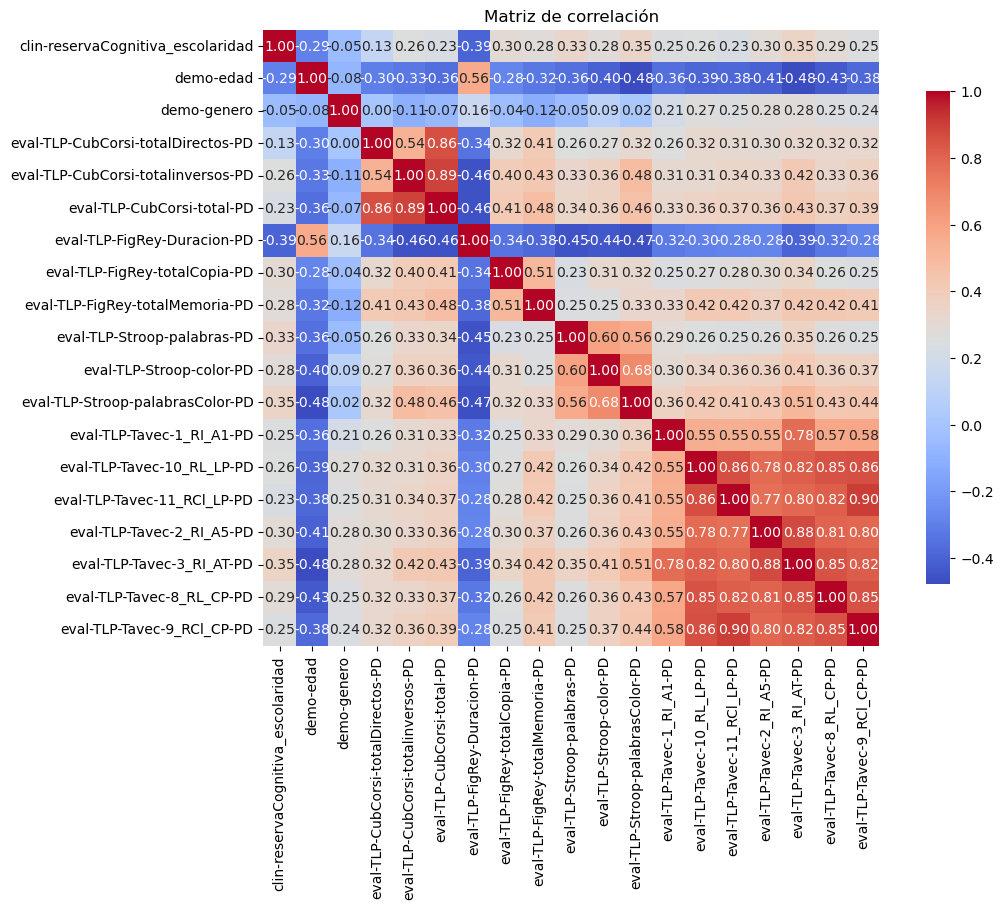

In [18]:
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de correlación')

#### Tipos de datos

In [19]:
import numpy as np

resumen = pd.DataFrame({
    'columna': df.columns,
    'tipo_dato': df.dtypes.values,
    'valores_unicos': df.nunique().values,
    'nulos': df.isnull().sum().values
})

resumen = resumen.sort_values(by='columna').reset_index(drop=True)
print(resumen)

                               columna tipo_dato  valores_unicos  nulos
0                           ED_2Clases  category               2      0
1    clin-reservaCognitiva_escolaridad     int64               5      0
2                            demo-edad     int64              33      0
3                          demo-genero     int64               2      0
4           eval-TLP-CubCorsi-total-PD     int64              18      0
5   eval-TLP-CubCorsi-totalDirectos-PD     int64              10      0
6   eval-TLP-CubCorsi-totalinversos-PD     int64              12      0
7          eval-TLP-FigRey-Duracion-PD     int64             197      0
8        eval-TLP-FigRey-totalCopia-PD   float64              36      0
9      eval-TLP-FigRey-totalMemoria-PD   float64              60      0
10            eval-TLP-Stroop-color-PD     int64              58      0
11         eval-TLP-Stroop-palabras-PD     int64              77      0
12    eval-TLP-Stroop-palabrasColor-PD     int64              50

#### Presencia +/- Inf

In [20]:
np.isinf(df.select_dtypes(include=['int64', 'float64'])).sum()

clin-reservaCognitiva_escolaridad     0
demo-edad                             0
demo-genero                           0
eval-TLP-CubCorsi-totalDirectos-PD    0
eval-TLP-CubCorsi-totalinversos-PD    0
eval-TLP-CubCorsi-total-PD            0
eval-TLP-FigRey-Duracion-PD           0
eval-TLP-FigRey-totalCopia-PD         0
eval-TLP-FigRey-totalMemoria-PD       0
eval-TLP-Stroop-palabras-PD           0
eval-TLP-Stroop-color-PD              0
eval-TLP-Stroop-palabrasColor-PD      0
eval-TLP-Tavec-1_RI_A1-PD             0
eval-TLP-Tavec-10_RL_LP-PD            0
eval-TLP-Tavec-11_RCl_LP-PD           0
eval-TLP-Tavec-2_RI_A5-PD             0
eval-TLP-Tavec-3_RI_AT-PD             0
eval-TLP-Tavec-8_RL_CP-PD             0
eval-TLP-Tavec-9_RCl_CP-PD            0
dtype: int64

#### Acotar valores índice
Acotar los valores outlier superiores de las variables índices TAVEC, de 27 a 33,  a 200 en PD y a 4 en PZ. Reescalar [0,1] las variables no PZ.

In [21]:
tavec_columns = [col for col in df.columns if 'Tavec' in col]

In [22]:
for column in tavec_columns:
    # Calculamos Q1, Q3 e IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Definimos el límite superior para outliers (fórmula común: Q3 + 1.5*IQR)
    limite = Q3 + 1.5 * IQR
    # Usar el mínimo entre el límite calculado y el tope especificado
    limite_final = min(limite, 200)
    # Aplicar clipping
    print(f"Columna: {column}, Límite superior aplicado: {limite_final}")
    df[column] = df[column].clip(upper=limite_final)

Columna: eval-TLP-Tavec-1_RI_A1-PD, Límite superior aplicado: 12.5
Columna: eval-TLP-Tavec-10_RL_LP-PD, Límite superior aplicado: 23.0
Columna: eval-TLP-Tavec-11_RCl_LP-PD, Límite superior aplicado: 20.0
Columna: eval-TLP-Tavec-2_RI_A5-PD, Límite superior aplicado: 20.0
Columna: eval-TLP-Tavec-3_RI_AT-PD, Límite superior aplicado: 83.0
Columna: eval-TLP-Tavec-8_RL_CP-PD, Límite superior aplicado: 20.5
Columna: eval-TLP-Tavec-9_RCl_CP-PD, Límite superior aplicado: 21.5


In [23]:
df.describe()

,clin-reservaCognitiva_escolaridad,demo-edad,demo-genero,eval-TLP-CubCorsi-totalDirectos-PD,eval-TLP-CubCorsi-totalinversos-PD,eval-TLP-CubCorsi-total-PD,eval-TLP-FigRey-Duracion-PD,eval-TLP-FigRey-totalCopia-PD,eval-TLP-FigRey-totalMemoria-PD,eval-TLP-Stroop-palabras-PD,eval-TLP-Stroop-color-PD,eval-TLP-Stroop-palabrasColor-PD,eval-TLP-Tavec-1_RI_A1-PD,eval-TLP-Tavec-10_RL_LP-PD,eval-TLP-Tavec-11_RCl_LP-PD,eval-TLP-Tavec-2_RI_A5-PD,eval-TLP-Tavec-3_RI_AT-PD,eval-TLP-Tavec-8_RL_CP-PD,eval-TLP-Tavec-9_RCl_CP-PD
count,314.000000,314.000000,314.000000,314.000000,314.00000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,4.022293,69.108280,1.684713,7.414013,6.66879,14.082803,200.299363,32.393312,16.042994,90.044586,61.089172,33.576433,6.482484,10.847134,11.601911,12.124204,50.866242,10.235669,11.359873
std,0.943862,7.655172,0.465372,1.671198,1.91476,3.144978,88.160757,4.697282,7.016223,18.885681,13.393707,10.402854,2.169829,3.396419,2.957224,2.613651,11.060158,3.423542,2.956735
min,1.000000,55.000000,1.000000,4.000000,0.00000,4.000000,75.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000
25%,3.000000,63.000000,1.000000,6.000000,6.00000,12.000000,135.250000,31.000000,11.000000,78.250000,53.000000,26.000000,5.000000,8.000000,10.000000,10.000000,43.000000,8.000000,9.000000
50%,4.000000,69.000000,2.000000,7.000000,6.00000,14.000000,183.500000,34.000000,16.500000,92.000000,63.000000,34.000000,6.000000,11.000000,12.000000,12.000000,51.000000,10.000000,12.000000
75%,5.000000,74.000000,2.000000,9.000000,8.00000,16.000000,247.500000,36.000000,21.000000,103.000000,70.000000,40.000000,8.000000,14.000000,14.000000,14.000000,59.000000,13.000000,14.000000
max,5.000000,88.000000,2.000000,13.000000,12.00000,22.000000,537.000000,36.000000,34.000000,133.000000,103.000000,74.000000,12.500000,16.000000,16.000000,16.000000,77.000000,16.000000,16.000000


#### Reescalar variables PD entre [0, 1]

In [24]:
pd_columns = [col for col in df.columns if 'PD' in col]

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()
df[pd_columns] = scaler.fit_transform(df[pd_columns])

In [27]:
df.describe()

,clin-reservaCognitiva_escolaridad,demo-edad,demo-genero,eval-TLP-CubCorsi-totalDirectos-PD,eval-TLP-CubCorsi-totalinversos-PD,eval-TLP-CubCorsi-total-PD,eval-TLP-FigRey-Duracion-PD,eval-TLP-FigRey-totalCopia-PD,eval-TLP-FigRey-totalMemoria-PD,eval-TLP-Stroop-palabras-PD,eval-TLP-Stroop-color-PD,eval-TLP-Stroop-palabrasColor-PD,eval-TLP-Tavec-1_RI_A1-PD,eval-TLP-Tavec-10_RL_LP-PD,eval-TLP-Tavec-11_RCl_LP-PD,eval-TLP-Tavec-2_RI_A5-PD,eval-TLP-Tavec-3_RI_AT-PD,eval-TLP-Tavec-8_RL_CP-PD,eval-TLP-Tavec-9_RCl_CP-PD
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,4.022293,69.108280,1.684713,0.379335,0.555732,0.560156,0.271211,0.861281,0.471853,0.677027,0.593099,0.453736,0.476738,0.677946,0.706794,0.757763,0.597942,0.639729,0.709992
std,0.943862,7.655172,0.465372,0.185689,0.159563,0.174721,0.190824,0.180665,0.206359,0.141998,0.130036,0.140579,0.188681,0.212276,0.197148,0.163353,0.170156,0.213971,0.184796
min,1.000000,55.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,63.000000,1.000000,0.222222,0.500000,0.444444,0.130411,0.807692,0.323529,0.588346,0.514563,0.351351,0.347826,0.500000,0.600000,0.625000,0.476923,0.500000,0.562500
50%,4.000000,69.000000,2.000000,0.333333,0.500000,0.555556,0.234848,0.923077,0.485294,0.691729,0.611650,0.459459,0.434783,0.687500,0.733333,0.750000,0.600000,0.625000,0.750000
75%,5.000000,74.000000,2.000000,0.555556,0.666667,0.666667,0.373377,1.000000,0.617647,0.774436,0.679612,0.540541,0.608696,0.875000,0.866667,0.875000,0.723077,0.812500,0.875000
max,5.000000,88.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Codificar variables categóricas
Ya vienen codificadas. La variable objetivo ED_2Clases no hace falta codificarla

In [28]:
df.select_dtypes(include='category')

,ED_2Clases
0,D
1,D
2,D
3,D
4,D
...,...
309,D
310,D
311,D
312,D


#### Guardar datos preprocesados

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   ED_2Clases                          314 non-null    category
 1   clin-reservaCognitiva_escolaridad   314 non-null    int64   
 2   demo-edad                           314 non-null    int64   
 3   demo-genero                         314 non-null    int64   
 4   eval-TLP-CubCorsi-totalDirectos-PD  314 non-null    float64 
 5   eval-TLP-CubCorsi-totalinversos-PD  314 non-null    float64 
 6   eval-TLP-CubCorsi-total-PD          314 non-null    float64 
 7   eval-TLP-FigRey-Duracion-PD         314 non-null    float64 
 8   eval-TLP-FigRey-totalCopia-PD       314 non-null    float64 
 9   eval-TLP-FigRey-totalMemoria-PD     314 non-null    float64 
 10  eval-TLP-Stroop-palabras-PD         314 non-null    float64 
 11  eval-TLP-Stroop-color-PD        

In [30]:
df.to_csv('../data/original/Identia_UNED_TLP_preprocessed.csv', index=False)

#### Dividir datos entrenamiento y test

In [31]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [32]:
np.random.seed(42)

# Inicializamos el divisor estratificado con 10 particiones (folds)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Guardamos los índices de entrenamiento y test para cada fold
train_indices = []
test_indices = []

# X puede ser el DataFrame completo, y es necesario para obtener los índices
# y es la variable de clase para estratificar (ED_2Clases)
X = df.drop('ED_2Clases', axis=1)
y = df['ED_2Clases']

# Generamos las divisiones
for train_idx, test_idx in skf.split(X, y):
    train_indices.append(train_idx)
    test_indices.append(test_idx)

# Ahora podemos verificar el balance de clases en cada conjunto
for i in range(10):
    train_set = df.iloc[train_indices[i]]
    test_set = df.iloc[test_indices[i]]
    train_set.to_csv(f'../data/train/set_{i}.csv', index=False)
    test_set.to_csv(f'../data/test/set_{i}.csv', index=False)
    print(f"Fold {i+1}:")
    print(f"  Train - Total: {len(train_set)}, Distribución de clases: {train_set['ED_2Clases'].value_counts(normalize=True)}")
    print(f"  Test  - Total: {len(test_set)}, Distribución de clases: {test_set['ED_2Clases'].value_counts(normalize=True)}")
    print()

Fold 1:
  Train - Total: 282, Distribución de clases: ED_2Clases
D    0.79078
H    0.20922
Name: proportion, dtype: float64
  Test  - Total: 32, Distribución de clases: ED_2Clases
D    0.78125
H    0.21875
Name: proportion, dtype: float64

Fold 2:
  Train - Total: 282, Distribución de clases: ED_2Clases
D    0.79078
H    0.20922
Name: proportion, dtype: float64
  Test  - Total: 32, Distribución de clases: ED_2Clases
D    0.78125
H    0.21875
Name: proportion, dtype: float64

Fold 3:
  Train - Total: 282, Distribución de clases: ED_2Clases
D    0.79078
H    0.20922
Name: proportion, dtype: float64
  Test  - Total: 32, Distribución de clases: ED_2Clases
D    0.78125
H    0.21875
Name: proportion, dtype: float64

Fold 4:
  Train - Total: 282, Distribución de clases: ED_2Clases
D    0.79078
H    0.20922
Name: proportion, dtype: float64
  Test  - Total: 32, Distribución de clases: ED_2Clases
D    0.78125
H    0.21875
Name: proportion, dtype: float64

Fold 5:
  Train - Total: 283, Distribuci